### [最短路径](https://www.cnblogs.com/wushaogui/p/9239735.html)

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

### 简单无向图

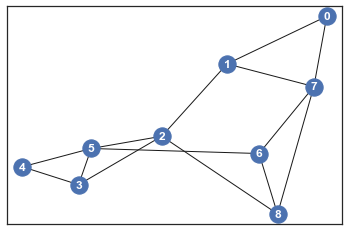

In [189]:
# 节点名称
# nodes = [0,1,2,3,4,5,6,7,8]
# 边列表，格式为：（节点，节点，权重）
edgess = [(0,1,3), (0,7,8), (1,7,3), (1,2,8), (7,8,1), (7,6,6), (8,2,2),
         (8,6,6), (2,5,4), (6,5,2), (2,3,7), (3,5,14), (3,4,9), (5,4,10)]
# 创建Graph对象
G = nx.Graph()
# 添加节点
# G.add_nodes_from(nodes)
# 添加带权重的边
G.add_weighted_edges_from(edgess)
# 绘图并设置各种参数
nx.draw_networkx(G, node_color='b', font_color='w', font_weight='bold')
plt.show()

### 简单有向图

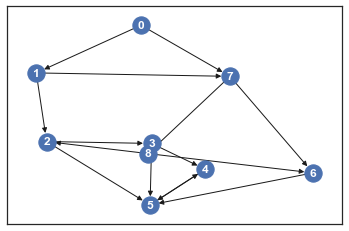

In [192]:
# 节点名称
# nodes = [0,1,2,3,4,5,6,7,8]
# 边列表，格式为：（节点，节点，权重）
edgess = [(0,1,3), (0,7,8), (1,7,3), (1,2,8), (7,8,1), (7,6,6), (8,2,2),
         (8,6,6), (2,5,4), (6,5,2), (2,3,7), (3,5,14), (3,4,9), (5,4,10),(4,5,6)]
# 创建Graph对象
G = nx.DiGraph()
# 添加节点
# G.add_nodes_from(nodes)
# 添加带权重的边
G.add_weighted_edges_from(edgess)
# 绘图并设置各种参数
nx.draw_networkx(G, node_color='b', font_color='w', font_weight='bold')
plt.show()

### 带权图

{0: array([1.        , 0.51184752]), 1: array([0.46373651, 0.02969851]), 2: array([-0.127981  , -0.18320862]), 3: array([-0.61663361, -0.57725092]), 4: array([-0.63893822, -0.96645709]), 5: array([-0.36391792, -0.58836886]), 6: array([0.02038391, 0.45331358]), 7: array([0.5625368 , 0.61507833]), 8: array([-0.29918646,  0.70534755])}


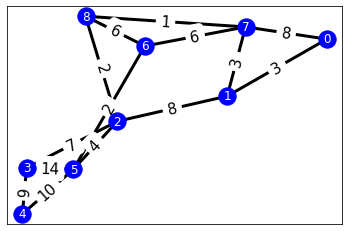

In [4]:
# sns.set(style='white')

# 节点名称
nodes = [0,1,2,3,4,5,6,7,8]
# 边列表，格式为：（节点，节点，权重）
edgess = [(0,1,3), (0,7,8), (1,7,3), (1,2,8), (7,8,1), (7,6,6), (8,2,2),
         (8,6,6), (2,5,4), (6,5,2), (2,3,7), (3,5,14), (3,4,9), (5,4,10)]
# 创建Graph对象
G = nx.Graph()
# 添加节点
G.add_nodes_from(nodes)
# 添加带权重的边
G.add_weighted_edges_from(edgess)
# 获取节点位置信息
pos=nx.spring_layout(G)
print(pos)
# 获取标签信息
labels = nx.get_edge_attributes(G,'weight')

# 绘图并设置各种参数
# 添加节点
nx.draw_networkx_nodes(G, pos,node_color='b')
# 添加边
nx.draw_networkx_edges(G, pos, width=3)
# 添加节点标号
nx.draw_networkx_labels(G, pos, font_size=12, font_color='w')
# 绘制带权边
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels, font_size=15)
plt.show()

### 0-4间的最短路径及距离（无向图）

In [157]:
# method参数默认为'dijkstra'，当边有向时，可以选择'bellman-ford'
# 不指定source时返回任意两点间最短路
p = nx.shortest_path(G, source=0, weight='weight', method='dijkstra')
print('0到4的最短路径为:',p[4])
d = nx.shortest_path_length(G, source=0, target=4, weight='weight')
print('0到4的最短距离为:',d)

0到4的最短路径为: [0, 1, 7, 8, 2, 5, 4]
0到4的最短距离为: 23


#### 方法二

In [143]:
# 第二个参数为'4'时，返回各个节点到'4'的最短路径
path=nx.single_source_dijkstra_path(G, 4, weight='weight')

# 第二个参数为'4'时，返回各个节点到'4'的最短路径的距离
length=nx.single_source_dijkstra_path_length(G, 4, weight='weight')


print(path)
print('----------------------------------------------------')
print(length)

{4: [4], 3: [4, 3], 5: [4, 5], 2: [4, 5, 2], 6: [4, 5, 6], 7: [4, 5, 2, 8, 7], 8: [4, 5, 2, 8], 1: [4, 5, 2, 8, 7, 1], 0: [4, 5, 2, 8, 7, 1, 0]}
----------------------------------------------------
{4: 0, 3: 9, 5: 10, 6: 12, 2: 14, 8: 16, 7: 17, 1: 20, 0: 23}


#### 高亮最短路径

In [148]:
Y = nx.Graph()
edgess = [(0,1,3), (0,7,8), (1,7,3), (1,2,8), (7,8,1), (7,6,6), (8,2,2),
         (8,6,6), (2,5,4), (6,5,2), (2,3,7), (3,5,14), (3,4,9), (5,4,10)]
# 添加带权边
for i in edgess:
    Y.add_edge(i[0], i[1], weight=i[2])

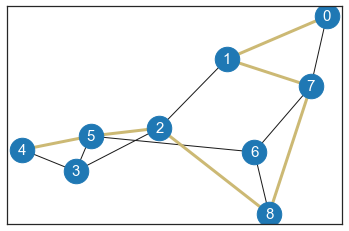

In [152]:
edgelists = []

# p[4]为0->4最短路径所经过的节点
point = p[4]
for i in range(len(point) - 1):
    edgelists.append((point[i], point[i+1]))
# print(edgelists)

# 设置节点    
pos=nx.spring_layout(Y)
nx.draw_networkx_nodes(Y,pos,node_size=600)

# 绘画所有边
nx.draw_networkx_edges(Y, pos)
# 绘画需要高亮的边
nx.draw_networkx_edges(Y, pos, edgelist=edgelists, edge_color='y', width=3)
# 显示并设置标号
nx.draw_networkx_labels(Y,pos,font_size=15,font_family='sans-serif', font_color='w')

# 显示坐标轴
plt.axis('on')
plt.show()

In [22]:
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)
pred = nx.reconstruct_path(0,4,predecessors)
print('0到4的最短路径为：', pred)

0到4的最短路径为： [0, 1, 7, 8, 2, 5, 4]


In [21]:
distance = nx.floyd_warshall_numpy(G)
dist = distance[4,0]
print('0到4的最短距离为：', dist)

0到4的最短距离为： 23.0


### 任意两点间的最短距离

In [187]:
p = nx.shortest_path(G,  weight='weight', method='dijkstra')
for i in range(9):
    print('节点%d到其他节点的最短距离：' % i, p[i])

节点0到其他节点的最短距离： {0: [0], 1: [0, 1], 7: [0, 1, 7], 2: [0, 1, 7, 8, 2], 8: [0, 1, 7, 8], 6: [0, 1, 7, 6], 5: [0, 1, 7, 8, 2, 5], 3: [0, 1, 7, 8, 2, 3], 4: [0, 1, 7, 8, 2, 5, 4]}
节点1到其他节点的最短距离： {1: [1], 0: [1, 0], 7: [1, 7], 2: [1, 7, 8, 2], 8: [1, 7, 8], 6: [1, 7, 6], 5: [1, 7, 8, 2, 5], 3: [1, 7, 8, 2, 3], 4: [1, 7, 8, 2, 5, 4]}
节点2到其他节点的最短距离： {2: [2], 1: [2, 8, 7, 1], 8: [2, 8], 5: [2, 5], 3: [2, 3], 7: [2, 8, 7], 6: [2, 5, 6], 0: [2, 8, 7, 1, 0], 4: [2, 5, 4]}
节点3到其他节点的最短距离： {3: [3], 2: [3, 2], 5: [3, 2, 5], 4: [3, 4], 1: [3, 2, 8, 7, 1], 8: [3, 2, 8], 7: [3, 2, 8, 7], 6: [3, 2, 5, 6], 0: [3, 2, 8, 7, 1, 0]}
节点4到其他节点的最短距离： {4: [4], 3: [4, 3], 5: [4, 5], 2: [4, 5, 2], 6: [4, 5, 6], 7: [4, 5, 2, 8, 7], 8: [4, 5, 2, 8], 1: [4, 5, 2, 8, 7, 1], 0: [4, 5, 2, 8, 7, 1, 0]}
节点5到其他节点的最短距离： {5: [5], 2: [5, 2], 6: [5, 6], 3: [5, 2, 3], 4: [5, 4], 7: [5, 2, 8, 7], 8: [5, 2, 8], 1: [5, 2, 8, 7, 1], 0: [5, 2, 8, 7, 1, 0]}
节点6到其他节点的最短距离： {6: [6], 7: [6, 7], 8: [6, 8], 5: [6, 5], 2: [6, 5, 2], 3: [6, 5

In [185]:
d = nx.shortest_path_length(G, weight='weight')
d = dict(d)
for i in range(9):
    print('节点%d到其他节点的最短距离：' % i, d[i])

节点0到其他节点的最短距离： {0: 0, 1: 3, 7: 6, 8: 7, 2: 9, 6: 12, 5: 13, 3: 16, 4: 23}
节点1到其他节点的最短距离： {1: 0, 0: 3, 7: 3, 8: 4, 2: 6, 6: 9, 5: 10, 3: 13, 4: 20}
节点2到其他节点的最短距离： {2: 0, 8: 2, 7: 3, 5: 4, 1: 6, 6: 6, 3: 7, 0: 9, 4: 14}
节点3到其他节点的最短距离： {3: 0, 2: 7, 4: 9, 8: 9, 7: 10, 5: 11, 1: 13, 6: 13, 0: 16}
节点4到其他节点的最短距离： {4: 0, 3: 9, 5: 10, 6: 12, 2: 14, 8: 16, 7: 17, 1: 20, 0: 23}
节点5到其他节点的最短距离： {5: 0, 6: 2, 2: 4, 8: 6, 7: 7, 4: 10, 1: 10, 3: 11, 0: 13}
节点6到其他节点的最短距离： {6: 0, 5: 2, 7: 6, 8: 6, 2: 6, 1: 9, 4: 12, 0: 12, 3: 13}
节点7到其他节点的最短距离： {7: 0, 8: 1, 1: 3, 2: 3, 6: 6, 0: 6, 5: 7, 3: 10, 4: 17}
节点8到其他节点的最短距离： {8: 0, 7: 1, 2: 2, 1: 4, 6: 6, 5: 6, 0: 7, 3: 9, 4: 16}
